In [42]:
# importing the neccessary libraries for numeric operations, data handling
import pandas as pd
import numpy as np
# import the scikit,LR modules and error metrics
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score, mean_squared_error
from scipy import stats
from sklearn.model_selection import train_test_split
# to visualise the dataset
import matplotlib.pyplot as plt
import seaborn as sns
# to detect the multi-collinearity among the predictor variables
from statsmodels.stats.outliers_influence import variance_inflation_factor
# scaling and polynomial feature to improve the model's efficiency 
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
# to use the stats function for probability and tests
import statsmodels.api as sm

In [30]:
# load dataset and make a copy - read data from csv file into pandas dataframe
df = pd.read_csv("mlr8.csv")
data = df.copy()
data

,y,x1,x2,x3
0,15171.04569,47.659651,201.130664,B
1,14610.38186,49.073748,192.928545,C
2,16352.18378,47.203739,199.095000,A
3,17002.60753,53.613146,199.934828,A
4,13499.36322,49.584912,206.376102,A
...,...,...,...,...
995,15666.10436,47.192748,200.049737,B
996,15096.71190,45.554624,206.345757,C
997,14923.12095,51.257426,198.415375,C
998,15908.45000,51.949503,200.096346,B


In [31]:
# Exploratory Data Analysis
data.head()

,y,x1,x2,x3
0,15171.04569,47.659651,201.130664,B
1,14610.38186,49.073748,192.928545,C
2,16352.18378,47.203739,199.095000,A
3,17002.60753,53.613146,199.934828,A
4,13499.36322,49.584912,206.376102,A


In [32]:
# shows the descriptive statistics
data.describe()

,y,x1,x2
count,1000.000000,1000.000000,1000.000000
mean,15454.300514,49.875794,200.126134
std,1861.868348,4.153451,3.198992
min,9183.651604,33.770110,187.626645
25%,14214.832900,46.954300,198.536816
50%,15446.202330,49.870760,200.110545
75%,16698.076227,52.518992,201.712418
max,21400.010230,61.825863,215.556281


In [33]:
# check for missing null values
data.isnull().sum().sort_values(ascending = False)

y     0
x1    0
x2    0
x3    0
dtype: int64

In [34]:
# shape of the dataset
data.shape

(1000, 4)

In [35]:
data.columns

Index(['y', 'x1', 'x2', 'x3'], dtype='object')

In [36]:
# convert categorical value into numeric value 
data["x3"]=data["x3"].astype('category')
data["x3"]=data["x3"].cat.codes
data

,y,x1,x2,x3
0,15171.04569,47.659651,201.130664,1
1,14610.38186,49.073748,192.928545,2
2,16352.18378,47.203739,199.095000,0
3,17002.60753,53.613146,199.934828,0
4,13499.36322,49.584912,206.376102,0
...,...,...,...,...
995,15666.10436,47.192748,200.049737,1
996,15096.71190,45.554624,206.345757,2
997,14923.12095,51.257426,198.415375,2
998,15908.45000,51.949503,200.096346,1


In [37]:
# ensure all columns are numeric. the error parameter converts non-numeric values into NaN and not raise an error.
data = data.apply(pd.to_numeric, errors = "coerce")
data

,y,x1,x2,x3
0,15171.04569,47.659651,201.130664,1
1,14610.38186,49.073748,192.928545,2
2,16352.18378,47.203739,199.095000,0
3,17002.60753,53.613146,199.934828,0
4,13499.36322,49.584912,206.376102,0
...,...,...,...,...
995,15666.10436,47.192748,200.049737,1
996,15096.71190,45.554624,206.345757,2
997,14923.12095,51.257426,198.415375,2
998,15908.45000,51.949503,200.096346,1


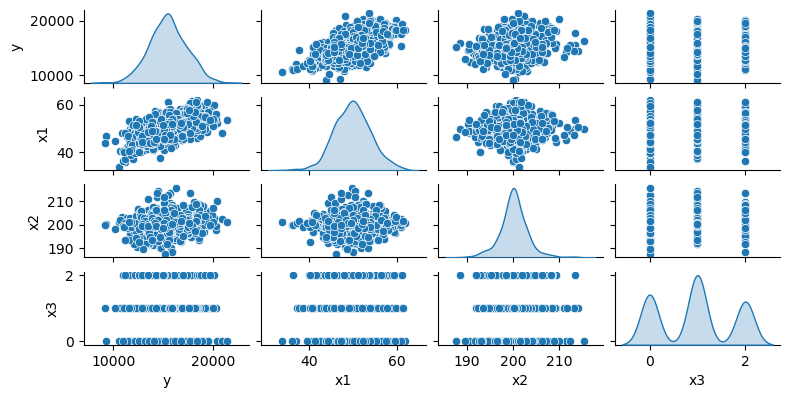

In [38]:
# pairwise plot to visualise the relationship between each variables in the dataset, diag_kind=kde parameter uses kernel density estimate
sns.pairplot(data=data,diag_kind="kde",height=1, aspect=2)

Insights :
1. y and x1 : there appears to be positive correlation between y and x1 as values of y increases when x1 increases, suggesting that x1 maybe a useful predictor of y.
2. y and x2 : no strong correlation between y and x2 as the plot is more scattered/randomly distributed.
3. y and x3 : x3 is categorical, clusters in the plot do not have much clear trend or correlation with y.
4. x1 and x2 : no clear relationship demonstrated because of random spread
5. x1 and x3, x2 and x3 : no clear trend shown as it is all distinct

In [39]:
# Splitting the data into test labels and training features
X = data.drop('y',axis=1)
X

,x1,x2,x3
0,47.659651,201.130664,1
1,49.073748,192.928545,2
2,47.203739,199.095000,0
3,53.613146,199.934828,0
4,49.584912,206.376102,0
...,...,...,...
995,47.192748,200.049737,1
996,45.554624,206.345757,2
997,51.257426,198.415375,2
998,51.949503,200.096346,1


In [40]:
y = data["y"]
y

0      15171.04569
1      14610.38186
2      16352.18378
3      17002.60753
4      13499.36322
          ...     
995    15666.10436
996    15096.71190
997    14923.12095
998    15908.45000
999    16748.83669
Name: y, Length: 1000, dtype: float64

In [43]:
# split using the specific random seed number
rand_seed = 23266848
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=rand_seed)
print(f"Training data shape X: {X_train.shape}")
print(f"Testing data shape X: {X_test.shape}")
print(f"Training data shape y: {y_train.shape}")
print(f"Testing data shape y: {y_test.shape}")

Training data shape X: (800, 3)
Testing data shape X: (200, 3)
Training data shape y: (800,)
Testing data shape y: (200,)


In [44]:
# calculating the error values before improving the model performance
# train the model
lr = LinearRegression()
lr.fit(X_train, y_train)
# predict test data based on training model
y_pred=lr.predict(X_test)
# evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error : {mse}")
r_score = r2_score(y_test, y_pred)
print(f"R score : {r_score}")
# print actual and pred y vals
act = y_test[:5]
print(f"act : \n{np.array(act)}")
pred = y_pred[:5]
print(f"pred : \n{np.array(pred)}")

Mean Squared Error : 2308816.6127315653
R score : 0.29701601687520574
act : 
[15163.98317 10822.69917 15767.46285 14118.7047  16694.12157]
pred : 
[15557.45272429 15229.57807684 16397.8819329  13564.81803887
 17723.07562641]


Error analysis :
1. MSE = 2308816, implies that error is relatively higher for the actual and predicted target values.
2. R square = 0.29, implies that only 29% of the data's variance has been explained by the model.


In [45]:
# improvising the model performance by introducing Scaling features - standardizing the features to have mean 0 and std deviation 1
scale = StandardScaler()
X_train_scaled = scale.fit_transform(X_train)
X_test_scaled = scale.transform(X_test)

In [46]:
# adding polynomial features to capture non-linearity
polyf = PolynomialFeatures(degree=2, include_bias=False)
X_train_polyf = polyf.fit_transform(X_train_scaled)
X_test_polyf = polyf.transform(X_test_scaled)

In [47]:
# building multiple regression models for comparison of errors
# 1. OLS - Ordinary Least Square Method
model_lr = LinearRegression()
model_lr.fit(X_train_polyf, y_train)
lr_y_pred = model_lr.predict(X_test_polyf)

# 2. Ridge Regression Model (L2 regularization)
model_ridge = Ridge(alpha=1.0)
model_ridge.fit(X_train_polyf, y_train)
ridge_y_pred = model_ridge.predict(X_test_polyf)

# 3. Lasso Regression Model (L1 regularization)
model_lasso = Lasso(alpha=0.1)
model_lasso.fit(X_train_polyf, y_train)
lasso_y_pred=model_lasso.predict(X_test_polyf)

In [51]:
# evaluate error metrices from the above models
def error_metrics(y_act, y_pred):
    rmse = np.sqrt(mean_squared_error(y_act, y_pred))
    r2 = r2_score(y_act, y_pred)
    return rmse, r2

# ols 
rmse,r2 = error_metrics(y_test,lr_y_pred)
print(f"LR - rmse : {rmse}, r_square {r2}")

# ridge
rmse,r2 = error_metrics(y_test,ridge_y_pred)
print(f"Ridge - rmse : {rmse}, r_square {r2}")

# lasso
rmse,r2 = error_metrics(y_test,lasso_y_pred)
print(f"Lasso - rmse : {rmse}, r_square {r2}")

LR - rmse : 1528.73719580066, r_square 0.28842340235144404
Ridge - rmse : 1528.4896590349272, r_square 0.2886538240477591
Lasso - rmse : 1528.682914379327, r_square 0.2884739338665677


In [52]:
# diagnostics - checking assumptions for OLS model with stats model- add const
X_train_polyf_const = sm.add_constant(X_train_polyf)
ols_sm = sm.OLS(y_train, X_train_polyf_const).fit()
print(ols_sm.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.427
Model:                            OLS   Adj. R-squared:                  0.420
Method:                 Least Squares   F-statistic:                     65.34
Date:                Sun, 17 Nov 2024   Prob (F-statistic):           1.98e-89
Time:                        00:58:41   Log-Likelihood:                -6940.4
No. Observations:                 800   AIC:                         1.390e+04
Df Residuals:                     790   BIC:                         1.395e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.543e+04     86.280    178.891      0.0

Text(0.5, 1.0, 'Rez vs Fit')

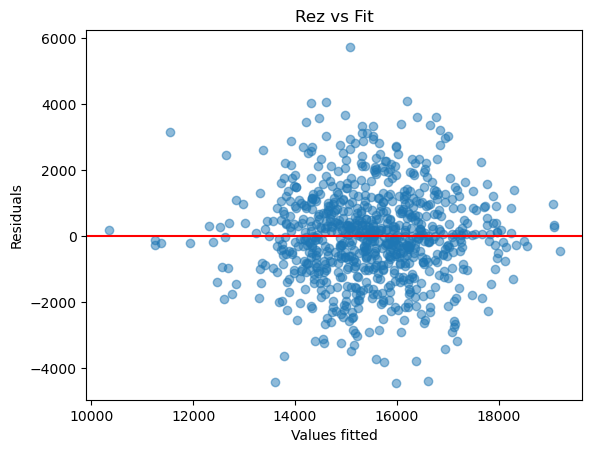

In [55]:
# residual analysis - to evaluate the assumptions
res = y_train - ols_sm.predict(X_train_polyf_const)

# plot the rez
# plt.figure(figsize=(6,6))
# rez vs fit
# plt.subplot(1,2,1)
plt.scatter(ols_sm.predict(X_train_polyf_const), res, alpha = 0.5)
plt.axhline(y=0,color='r', linestyle='-')
plt.xlabel("Values fitted")
plt.ylabel("Residuals")
plt.title("Rez vs Fit")

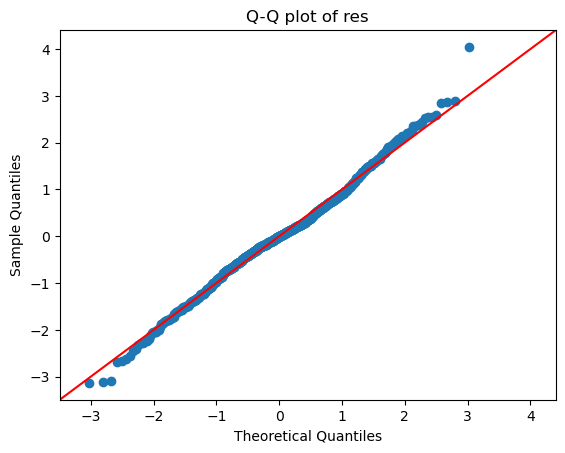

In [56]:
# q-q plot for normality
# plt.subplot(1,2,2)
sm.qqplot(res, line='45',fit = True)
plt.title("Q-Q plot of res")
plt.show()

Analysis on plot:
1. Random Scatter: The residuals are randomly scattered around the horizontal line at zero, implying that the model’s errors are randomly distributed.
2. The Q-Q plot implies the model is trained well and the residuals mostly follow a normal distribution, indicating that there are not many significant errors

In [20]:
# detect outliers using z score
z_score = np.abs(stats.zscore(data))
threshold = 3
outliers_detect = (z_score > threshold)
print(f"Z score outliers on the data : \n{outliers_detect}")

Z score outliers on the data : 
         y     x1     x2     x3
0    False  False  False  False
1    False  False  False  False
2    False  False  False  False
3    False  False  False  False
4    False  False  False  False
..     ...    ...    ...    ...
995  False  False  False  False
996  False  False  False  False
997  False  False  False  False
998  False  False  False  False
999  False  False  False  False

[1000 rows x 4 columns]


<Axes: >

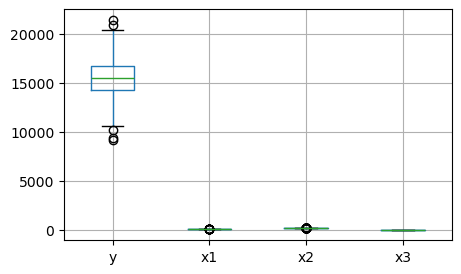

In [23]:
# using visualisation
plt.figure(figsize=(5,3))
data.boxplot()

Assumptions Check:

Linearity: Check scatter plots of predictors vs. residuals.
Homoscedasticity: Plot residuals vs. fitted values.
Normality of Residuals: Plot a Q-Q plot for residuals.
Multicollinearity: Check the Variance Inflation Factor (VIF) for each predictor.
Independence: Analyze residuals to check for patterns.